# Firdaus Adi Nugroho

### Making the compatible and comparing the model for Credit Scoring

In [1]:
# import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # Import split
from sklearn.ensemble import RandomForestClassifier # Import Random Frest Classfier

from numpy.core.umath_tests import inner1d
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.metrics import roc_curve, roc_auc_score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')
d

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA PREPARATION

In [4]:
#dimension of dataset

data.shape

NameError: ignored

In [5]:
#describe the dataset

data.describe()

NameError: ignored

In [0]:
data.head()

In [0]:
#split between numeric and categorical

numeric = data.columns[[1,5,9,10,11,12,13,14]]
data_numeric = data[numeric]
categorical = data.drop(columns=numeric,axis=1)
data_categorical = data.columns

In [6]:
#check the missing value

sum_null = data.isnull().sum()
sum_null = pd.DataFrame(sum_null,columns=['null'])
j=1
sum_tot = len(data)
sum_null['percent']=sum_null['null']/sum_tot
round(sum_null,3).sort_values('percent', ascending=False)

NameError: ignored

# DATA VISUALIZATION

In [0]:
#create correlation with hitmap

#from this correlation, we know the value percentages of the correlation(1 or -1). The bigger value, so the correlation has big value too.
#weather has big correlation with the lattitude (-0,78). 

#create correlation
corr = data.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(30,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [0]:
fig = sns.distplot(data['AGE'], kde = True, color = 'darkblue', label = 'AGE').set_title('AGE')

In [0]:
categorical.head()

In [0]:
data_numeric.head()

In [0]:
f= plt.figure(figsize=(16, 6))

sns.countplot(data['MARRIAGE'], order = data['MARRIAGE'].value_counts().index)

In [0]:
plt.figure(figsize=(16, 6))
sns.countplot(data['SEX'], order = data['SEX'].value_counts().index)

In [0]:
plt.figure(figsize=(16, 6))
sns.countplot(data['EDUCATION'], order = data['EDUCATION'].value_counts().index)

In [0]:
plt.figure(figsize=(16, 6))
sns.countplot(data['AGE'], order = data['AGE'].value_counts().index)

In [0]:
f=plt.figure(figsize=(17,8))

f.add_subplot(1,2,1)
sns.boxplot(data = data, x = 'AGE', color = 'cyan', orient = "h").set_title('')

f.add_subplot(1,2,2)
sns.boxplot(data = data, x = 'LIMIT_BAL', color = 'red', orient = "h").set_title('')

NameError: ignored

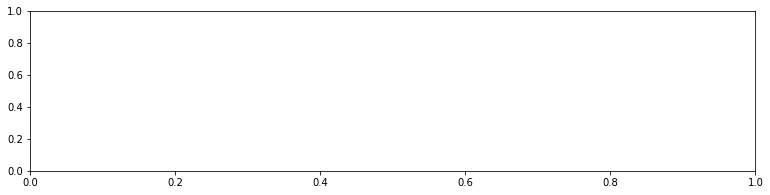

In [7]:
f=plt.figure(figsize=(13,10))
f.add_subplot(3,1,1)
sns.countplot(categorical['PAY_1'], order=categorical['PAY_1'].value_counts().index)
f.add_subplot(3,1,2)
sns.countplot(categorical['PAY_2'],order=categorical['PAY_2'].value_counts().index)
f.add_subplot(3,1,3)
sns.countplot(categorical['PAY_3'],order=categorical['PAY_3'].value_counts().index)
plt.xticks(rotation=90)

In [0]:
categorical.head()

In [8]:
data.head()

NameError: ignored

In [0]:
#making the dummies data

data =pd.get_dummies(data,drop_first=True)
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [0]:
feature = ['EDUCATION','AGE', 'PAY_1', 'PAY_2', 'PAY_3']
X=data[feature]  # Features
y=data['TARGET']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
#define the true positive and true negative for ROC

def rocCurve(aClf, X_test,y_test, modelName):
    roc_auc = roc_auc_score(y_test,aClf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, aClf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr,tpr, label='Area of curve = %0.2f' % roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Plot')
    plt.legend(loc='lower right')
    plt.show()

# Model

# 1. Random Forests
#### Random Forest increases predictive power of the algorithm and also helps prevent overfitting. Random forest is the most simple and widely used algorithm. Used for both classification and regression

In [0]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [0]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7794707297514034


In [0]:
y_train.head(10)

7433     0
14928    1
15369    1
5409     0
3387     0
10583    1
15670    1
16144    1
12716    1
4914     0
Name: TARGET, dtype: int64

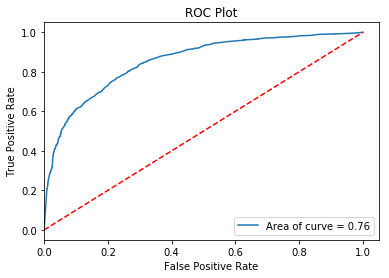

In [0]:
#plot ROC Random Forest

rocCurve(clf,X_test,y_test, modelName = 'Random Forest')

# 2. SVM (Support Vector Machine)
#### Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges

In [0]:
svm_clf = SVC(kernel = 'rbf')
svm_clf.fit(X_train,y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Accuracy: ',format(svm_clf.score(X_test,y_test)))

Accuracy:  0.7919005613472334


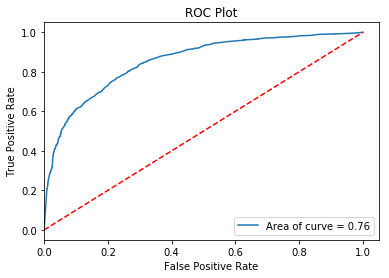

In [0]:
#plot ROC SVM

rocCurve(clf,X_test,y_test, modelName = 'Support Vector Machine')

# 3. Decision Tree

In [0]:
clf = DecisionTreeClassifier()

#Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [0]:
#print the accuracy of Decision Tree

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7734562951082599


In [0]:
#Plot the Decision Tree

#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True, feature_names = feature,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('creditscore.png')
#Image(graph.create_png())

In [0]:
import pickle